In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
desired_width = 320
pd.set_option('display.width', desired_width)
pd.set_option('display.max_columns', 10)
df = pd.read_csv('SchData2013.csv', low_memory=False)

In [3]:
print(df.shape)
print(df.info())
print(df.describe())

(33173, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33173 entries, 0 to 33172
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   FY                              33173 non-null  object 
 1   SurgicalArea                    33173 non-null  object 
 2   OperatingRoom                   33173 non-null  object 
 3   ORCaseNumber                    33173 non-null  object 
 4   SurgicalSpecialty               33173 non-null  object 
 5   SSSNo                           33173 non-null  int64  
 6   PatientType                     33173 non-null  int64  
 7   SchedulePriority                33173 non-null  int64  
 8   AddOnIndicator                  33173 non-null  object 
 9   CaseDOW                         33173 non-null  object 
 10  CaseMonth                       0 non-null      float64
 11  PrimaryProcedure                33173 non-null  object 
 12  ScheduledStartDate_T

In [4]:
# Fill missing values in int64 columns with the mean value for that column
int64_columns = df.select_dtypes(include=['int64']).columns
df[int64_columns] = df[int64_columns].fillna(df.mean())

# Fill missing values in float64 columns with the mean value for that column
float64_columns = df.select_dtypes(include=['float64']).columns
df[float64_columns] = df[float64_columns].fillna(df.mean())

print(df['PatientInRoomMin'].isnull().sum())
print(df['SchCreateDays'].isnull().sum())


C:\Users\adhir\AppData\Local\Temp\ipykernel_8136\2417231367.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[int64_columns] = df[int64_columns].fillna(df.mean())


0
0


C:\Users\adhir\AppData\Local\Temp\ipykernel_8136\2417231367.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[float64_columns] = df[float64_columns].fillna(df.mean())


In [7]:
df = df.drop('CaseMonth', axis=1)
df = df.dropna()
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
df = df.drop(cat_cols, axis=1)
df = df.reset_index(drop=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33173 entries, 0 to 33172
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SSSNo                  33173 non-null  int64  
 1   PatientType            33173 non-null  int64  
 2   SchedulePriority       33173 non-null  int64  
 3   CaseLevel              33173 non-null  int64  
 4   PatientAge             33173 non-null  int64  
 5   ScheduledCaseDuration  33173 non-null  int64  
 6   TotalSurgeryMin        33173 non-null  int64  
 7   PatientInRoomMin       33173 non-null  int64  
 8   SetUpMin               33173 non-null  int64  
 9   CleanUpMin             33173 non-null  int64  
 10  SchCreateDays          33173 non-null  float64
 11  OTS                    33173 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 3.0 MB
None


In [5]:
diced_df = df[(df["SurgicalArea"] == "HHOR") & (df["SSSNo"] == 9) & (df["PatientType"] == 2)]

# calculate the mean and median of PatientInRoomMin for the diced dataframe
mean = diced_df["PatientInRoomMin"].mean()
median = diced_df["PatientInRoomMin"].median()

print(diced_df.head(10))
print("Mean of PatientInRoomMin: {:.2f}".format(mean))
print("Median of PatientInRoomMin: {:.2f}".format(median))

        FY SurgicalArea OperatingRoom   ORCaseNumber SurgicalSpecialty  ...  SetUpMin  CleanUpMin  SchCreateDays RoomNo OTS
632   FY13         HHOR      HH OR 02  HH-2012-11642             ORTHO  ...        50          20        32.0819      2   1
1126  FY13         HHOR      HH OR 02   HH-2012-9355             ORTHO  ...        40          10         6.5986      2   0
1268  FY13         HHOR      HH OR 06   HH-2013-2106             ORTHO  ...        60           0         3.9076      6   1
1479  FY13         HHOR      HH OR 10   HH-2013-5954           ORT/TRA  ...        30          14        19.8743     10   0
2052  FY13         HHOR      HH OR 02   HH-2013-7917             ORTHO  ...        30           9         1.7861      2   1
2053  FY13         HHOR      HH OR 02   HH-2013-9049             ORTHO  ...        25          33         4.7083      2   0
2121  FY13         HHOR      HH OR 02  HH-2012-11430             ORTHO  ...        30          10        15.8146      2   0
2125  FY

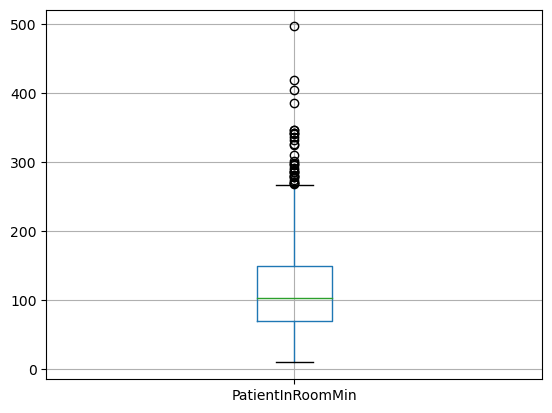

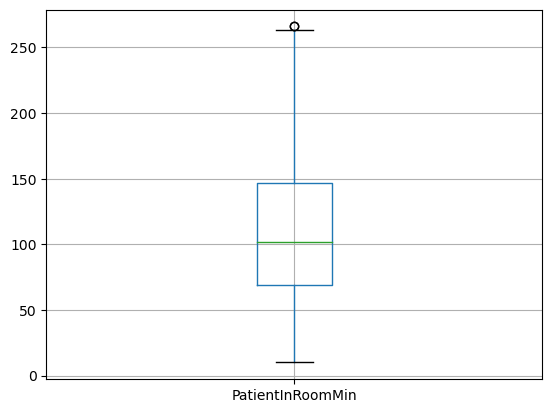

In [6]:
# create a boxplot for PatientInRoomMin
diced_df.boxplot(column=["PatientInRoomMin"])
plt.show()

# calculate the IQR and remove outliers
Q1 = diced_df["PatientInRoomMin"].quantile(0.25)
Q3 = diced_df["PatientInRoomMin"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
diced_df = diced_df[(diced_df["PatientInRoomMin"] >= lower_bound) & (diced_df["PatientInRoomMin"] <= upper_bound)]

# create a boxplot for PatientInRoomMin after removing outliers
diced_df.boxplot(column=["PatientInRoomMin"])
plt.show()